In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

### plot special directions

In [3]:
indt0 = [ 72,103, 88,104,
          76, 91, 92,108,
          80, 95, 96,112,
          84, 99,100,116,  
           0,  1,  2,  3, 
         188,189,190,191]
indt1 = [ 27, 28, 44,
          31, 32, 48,
          35, 36, 52,
          39, 24, 40, 
          74, 89, 90,106, 
          78, 93, 94,110, 
          82, 97, 98,114,  
          86,101,102,118,
         140,155,156,
         144,159,160,
         148,163,164,
         136,167,152
         ]
indt2 = [13, 25, 26, 42,
          16, 29, 30, 46,
          19, 33, 34, 50,
          22, 37, 38, 54,
         138,153,154,169,
         142,157,158,172,
         146,161,162,175,
         150,165,166,178]
indt3 = []
nrotation = 192
for ind in range(nrotation):
    if (ind not in indt0) and \
       (ind not in indt1) and \
       (ind not in indt2) :
        indt3.append(ind)
print(len(indt3))

96


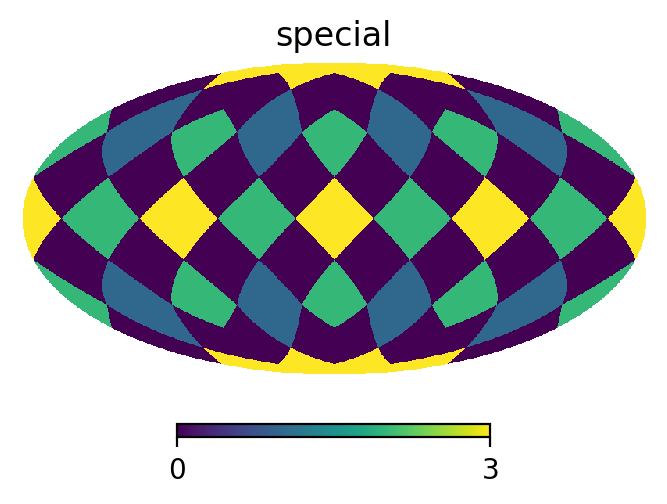

In [4]:
from matplotlib.colors import ListedColormap
mp = np.ones((nrotation), dtype=int)
mp[indt0] = 3
mp[indt1] = 2
mp[indt2] = 1
mp[indt3] = 0
cmap = ListedColormap(["gray", "g", "b", "r"])
mpu = hp.ud_grade(mp, nside_out=8)
hp.mollview(mpu, title='special', min=0, max=3, sub=121)


# Line-of-sight Finder (LOSF)

In [5]:
from losf import GetCount_ibox
from functools import partial
from multiprocessing import pool

## lightcone geometry
nbox = 46 # 4600 Mpc/h ~ zs=3.0
thickness = 100 # Mpc/h
boxsize = 1200
## position of observer
pos_obs = [0,0,0] 
# 10 particles on each side is enough. 
# increasing this does not affect the result
ppd = 10


## nside = 4

In [6]:
nside = 4
pixarea = hp.nside2pixarea(nside, degrees=True)
print(r'nside={:d}, sky coverage for each pixel is {:.0f} deg^2'.format(nside, pixarea))
funcp = partial(GetCount_ibox, 
                nside=nside,
                boxsize=boxsize,
                thickness=thickness,
                pos_obs=pos_obs,
                ppd=ppd
               )

pooli = pool.Pool(processes=nbox)
count_allbox = np.array(pooli.map(funcp, np.arange(nbox)))
pooli.close()
pooli.join()
# print(count_allbox.shape)
count_allbox = np.sum(count_allbox, axis=0)
# print(count_allbox.shape)
nrepeatmax = np.max(count_allbox) + 1
print('The most times of appearance: ',nrepeatmax)
nheal = hp.nside2npix(nside)
nrepeat = np.zeros((nheal, nrepeatmax))
for ir in range(nheal):
    uqn, uqcount =  np.unique(count_allbox[ir,:], return_counts=True)
    # if ir == 0:
        # print(uqn)
    nrepeat[ir, uqn] += uqn*uqcount

nside=4, sky coverage for each pixel is 215 deg^2
The most times of appearance:  6


number of unique light-cone: 0
Total sky coverage: 0 deg^2


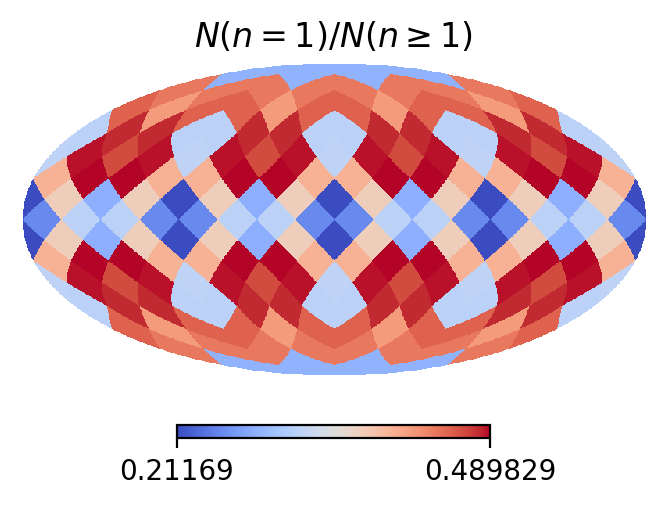

In [7]:
cmap = plt.cm.coolwarm
ttmap = np.sum(nrepeat[:,[1]], axis=1)/np.sum(nrepeat[:,1:], axis=1)
vmin = ttmap.min(); vmax = ttmap.max()
fig = plt.figure()
hp.mollview(ttmap, title=r'$N(n = 1) / N(n\geq 1)$', 
            sub=(1,2,1), cmap=cmap,
            min=vmin, max=vmax,
            fig=fig)
plt.savefig('losf-nside{:d}.pdf'.format(nside), dpi=200, bbox_inches='tight')
ind = np.where(ttmap == 1)[0]
print('number of unique light-cone: {:d}'.format(len(ind)))
print('Total sky coverage: {:.0f} deg^2'.format(len(ind)*pixarea))


## nside = 8

In [8]:
nside = 8
pixarea = hp.nside2pixarea(nside, degrees=True)
print(r'nside={:d}, sky coverage for each pixel is {:.0f} deg^2'.format(nside, pixarea))
funcp = partial(GetCount_ibox, 
                nside=nside,
                boxsize=boxsize,
                thickness=thickness,
                pos_obs=pos_obs,
                ppd=ppd
               )

pooli = pool.Pool(processes=nbox)
count_allbox = np.array(pooli.map(funcp, np.arange(nbox)))
pooli.close()
pooli.join()
# print(count_allbox.shape)
count_allbox = np.sum(count_allbox, axis=0)
# print(count_allbox.shape)
nrepeatmax = np.max(count_allbox) + 1
print('The most times of appearance: ',nrepeatmax)

nheal = hp.nside2npix(nside)
nrepeat = np.zeros((nheal, nrepeatmax))
for ir in range(nheal):
    uqn, uqcount =  np.unique(count_allbox[ir,:], return_counts=True)
    # if ir == 0:
        # print(uqn)
    nrepeat[ir, uqn] += uqn*uqcount

nside=8, sky coverage for each pixel is 54 deg^2
The most times of appearance:  5


number of unique light-cone: 128
Total sky coverage: 6875 deg^2


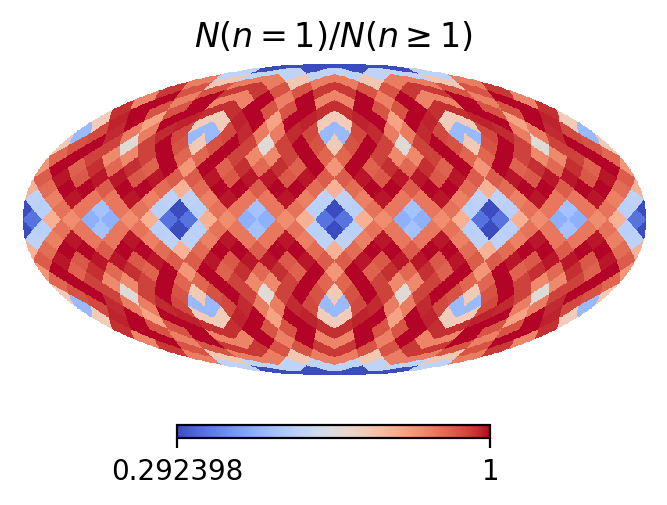

In [9]:
cmap = plt.cm.coolwarm
ttmap = np.sum(nrepeat[:,[1]], axis=1)/np.sum(nrepeat[:,1:], axis=1)
vmin = ttmap.min(); vmax = ttmap.max()
fig = plt.figure()
hp.mollview(ttmap, title=r'$N(n = 1) / N(n\geq 1)$', 
            sub=(1,2,1), cmap=cmap,
            min=vmin, max=vmax,
            fig=fig)
plt.savefig('losf-nside{:d}.pdf'.format(nside), dpi=200, bbox_inches='tight')
ind = np.where(ttmap == 1)[0]
print('number of unique light-cone: {:d}'.format(len(ind)))
print('Total sky coverage: {:.0f} deg^2'.format(len(ind)*pixarea))
